In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#Read the data
data = pd.read_csv('GSE159337_rare_dis_read_count_ori.csv.gz')


In [3]:
data

,V1,C1,C2,C3,C4,C5,C6,C7,P1,P2,P3,P4,P5,P6,P7
0,ENSG00000223972,8,5,12,10,8,8,6,12,3,9,13,7,3,2
1,ENSG00000227232,12,23,34,19,29,24,26,22,14,25,35,38,19,14
2,ENSG00000278267,2,2,1,0,0,0,1,0,5,0,1,2,1,0
3,ENSG00000243485,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,ENSG00000284332,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000271254,49,41,42,39,55,59,68,46,70,76,41,52,48,78
60619,ENSG00000275405,218,88,287,157,338,286,292,117,189,249,121,388,195,187
60620,ENSG00000275987,0,0,0,0,0,0,0,0,0,0,0,0,2,0
60621,ENSG00000277475,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [4]:
#Remove the geneId and save it to another array
gene = data['V1']
data.drop(['V1'],axis=1,inplace=True)
colo = data.columns
data.dropna(inplace = True)


In [5]:
#Get the cpm of the data
cpm = []
for i in range(0,len(data.columns)):
    tot = data.iloc[:,i].sum()
    count = (data.iloc[:,i]/tot)*10**6
    cpm.append(count)


In [6]:
cpm = np.array(cpm)
cpm
#Convert the cpm to log values
log = np.log2(cpm+1)
log

array([[1.02196998, 1.34825221, 0.33075628, ..., 0.        , 0.        ,
        0.        ],
       [0.66907075, 1.89306044, 0.30570138, ..., 0.        , 0.        ,
        0.        ],
       [1.12087469, 2.11388904, 0.13474533, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.77414083, 2.27953535, 0.26652401, ..., 0.        , 0.        ,
        0.        ],
       [0.40237741, 1.60280496, 0.14695238, ..., 0.28031031, 0.        ,
        0.        ],
       [0.29056828, 1.35718816, 0.        , ..., 0.        , 0.15258711,
        0.        ]])

In [7]:
#Control sample in vec1 and Tumor sample in vec2
vec2 = log[0:6]
vec2
vec1 = log[6:12]
vec1

array([[0.64038879, 1.77452201, 0.1284582 , ..., 0.        , 0.        ,
        0.        ],
       [1.11918986, 1.65495066, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38183316, 1.27141578, 0.58975782, ..., 0.        , 0.13881292,
        0.        ],
       [0.94755779, 1.83974142, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.42465429, 2.4686346 , 0.17578268, ..., 0.        , 0.        ,
        0.        ],
       [0.77414083, 2.27953535, 0.26652401, ..., 0.        , 0.        ,
        0.        ]])

In [8]:
meanTum = np.mean(vec1,axis=0)
meanCont = np.mean(vec2,axis=0)

In [9]:
from scipy.stats import ttest_ind
Pvalue = ttest_ind(vec1,vec2).pvalue
Pvalue

array([0.88218024, 0.53499311, 0.56870854, ...,        nan, 0.34089313,
              nan])

In [10]:
log2FC = meanTum - meanCont
log2FC

array([-0.02536707,  0.13299031,  0.06488662, ...,  0.        ,
        0.02313549,  0.        ])

In [11]:
res = np.stack((meanTum,meanCont,Pvalue,log2FC),axis = 0)
res

array([[ 0.88129412,  1.88146664,  0.19342045, ...,  0.        ,
         0.02313549,  0.        ],
       [ 0.90666119,  1.74847633,  0.12853383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88218024,  0.53499311,  0.56870854, ...,         nan,
         0.34089313,         nan],
       [-0.02536707,  0.13299031,  0.06488662, ...,  0.        ,
         0.02313549,  0.        ]])

In [12]:
data = pd.DataFrame(res)
data = data.T
data

,0,1,2,3
0,0.881294,0.906661,0.882180,-0.025367
1,1.881467,1.748476,0.534993,0.132990
2,0.193420,0.128534,0.568709,0.064887
3,0.045646,0.023982,0.576594,0.021664
4,0.000000,0.000000,NaN,0.000000
...,...,...,...,...
60618,2.799484,2.567204,0.119658,0.232281
60619,4.485747,4.522682,0.916102,-0.036935
60620,0.000000,0.000000,NaN,0.000000
60621,0.023135,0.000000,0.340893,0.023135


In [13]:
data.columns = ['meanTumor','meanControl','Pvalue','Log2FC']
data

,meanTumor,meanControl,Pvalue,Log2FC
0,0.881294,0.906661,0.882180,-0.025367
1,1.881467,1.748476,0.534993,0.132990
2,0.193420,0.128534,0.568709,0.064887
3,0.045646,0.023982,0.576594,0.021664
4,0.000000,0.000000,NaN,0.000000
...,...,...,...,...
60618,2.799484,2.567204,0.119658,0.232281
60619,4.485747,4.522682,0.916102,-0.036935
60620,0.000000,0.000000,NaN,0.000000
60621,0.023135,0.000000,0.340893,0.023135


In [14]:
data['Pvalue'] = data['Pvalue'].fillna(1)
data

,meanTumor,meanControl,Pvalue,Log2FC
0,0.881294,0.906661,0.882180,-0.025367
1,1.881467,1.748476,0.534993,0.132990
2,0.193420,0.128534,0.568709,0.064887
3,0.045646,0.023982,0.576594,0.021664
4,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...
60618,2.799484,2.567204,0.119658,0.232281
60619,4.485747,4.522682,0.916102,-0.036935
60620,0.000000,0.000000,1.000000,0.000000
60621,0.023135,0.000000,0.340893,0.023135


In [15]:
data.insert(0,'Gene',gene)
data

,Gene,meanTumor,meanControl,Pvalue,Log2FC
0,ENSG00000223972,0.881294,0.906661,0.882180,-0.025367
1,ENSG00000227232,1.881467,1.748476,0.534993,0.132990
2,ENSG00000278267,0.193420,0.128534,0.568709,0.064887
3,ENSG00000243485,0.045646,0.023982,0.576594,0.021664
4,ENSG00000284332,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...
60618,ENSG00000271254,2.799484,2.567204,0.119658,0.232281
60619,ENSG00000275405,4.485747,4.522682,0.916102,-0.036935
60620,ENSG00000275987,0.000000,0.000000,1.000000,0.000000
60621,ENSG00000277475,0.023135,0.000000,0.340893,0.023135


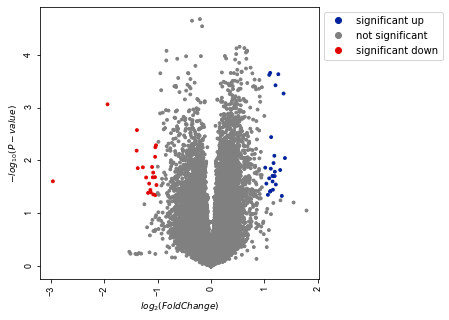

In [16]:
from bioinfokit import visuz,analys
import matplotlib.pyplot as plt
visuz.GeneExpression.volcano(data, lfc='Log2FC', pv='Pvalue', 
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1),show = True)
